# Machine Learning Pipelines and GridSearchCV

A major advantage of using a pipeline is that it enables comprehensive cross-validation and hyperparameter tuning for all steps simultaneously. By integrating the pipeline within GridSearchCV, you can fine-tune not only the model but also the preprocessing steps, leading to optimized overall performance. Pipelines are essential for scenarios where preprocessing involves estimators performing operations like scaling, encoding categorical variables, imputing missing values, and dimensionality reduction. Pipelines ensure these steps are reproducibly applied to both training and test data.

The is to learn how to build and optimize a complex machine learning model using a pipeline and crossvalidation to tune its hyperparameters.

The Practice Project, which follows next, is more hands-on. There you will participate by completing code segments and formulating responses to more open-ended questions.
The better you understand this lab, the easier the Practice Project and Final Project will be for you.


## Import the required libraries


In [2]:
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install seaborn==0.13.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 125.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 169.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 169.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 146.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 143.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 136.7 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Train a model using a pipeline
We'll start with an example of building a pipeline, fitting it to the Iris data, and evaluating its accuracy.


### Load the Iris data set


In [4]:
data = load_iris()
X, y = data.data, data.target
labels = data.target_names

### Instantiate a pipeline consisting of StandardScaler, PCA, and KNeighborsClassifier


In [5]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Step 1: Standardize features
    ('pca', PCA(n_components=2),),       # Step 2: Reduce dimensions to 2 using PCA
    ('knn', KNeighborsClassifier(n_neighbors=5,))  # Step 3: K-Nearest Neighbors classifier
])

### Splitting the data into training and test sets


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

### Fit the pipeline on the training set
The pipeline consists of a sequence of three estimators, and should be viewed as the machine learning model we are training and testing.  


In [8]:
pipeline.fit(X_train, y_train)

# Measure the pipeline accuracy on the test data
test_score = pipeline.score(X_test, y_test)
print(f"{test_score:.3f}")

0.900


### Get the model predictions


In [9]:
y_pred = pipeline.predict(X_test)

### Generating the confusion matrix for the KNN model and plot it


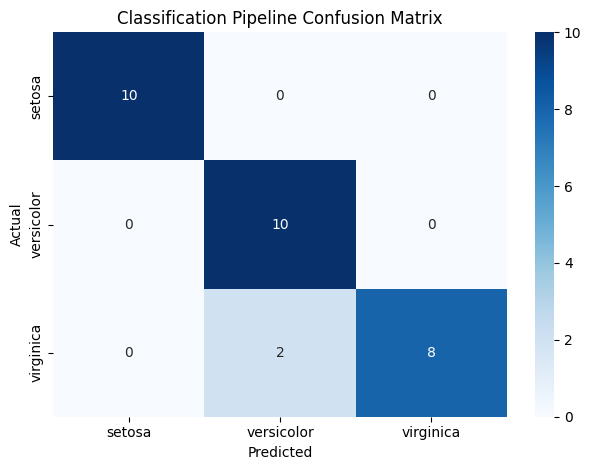

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Creating a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

plt.title('Classification Pipeline Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

### Describing the errors made by the model.


The model incorectly classified two viginica irises as versicolor, and one versicolor as virginica. Not bad, only three classification errors out of 30 irises on our first attempt! 


## Tune hyperparameters using a pipeline within cross-validation grid search

We created a model but haven't yet attempted to optimize its performance.  Let's see if we can do better.
using cross validation. 


### Instantiate the pipeline
We'll preprocess the data by scaling it and transforming it onto a to-be-determined number of principle components, follow that up with a KNN model classifier, and combine these estimators into a pipeline. We'll then optimize the pipeline using crossvalidation over a hyperparameter grid search. This will allow us find the best model for the set of trial hyperparamters.


In [12]:
pipeline = Pipeline(
                    [('scaler', StandardScaler()),
                     ('pca', PCA()),
                     ('knn', KNeighborsClassifier()) 
                    ]
                   )

### Define a model parameter grid to search over


In [13]:
# Hyperparameter search grid for numbers of PCA components and KNN neighbors
param_grid = {'pca__n_components': [2, 3],
              'knn__n_neighbors': [3, 5, 7]
             }

### Choose a cross validation method

In [14]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Exercise Determining the best parameters

In [15]:
best_model = GridSearchCV(estimator=pipeline,
                          param_grid=param_grid,
                          cv=cv,
                          scoring='accuracy',
                          verbose=2
                         )

### Fit the best GridSearchCV model to the training data


In [16]:
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_c

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7],
                         'pca__n_components': [2, 3]},
             scoring='accuracy', verbose=2)

Go ahead and explore the `GridSearchCV` graphic that describes your estimator's structure, including the hyperparameters found for the best estimator.
You can get specific help on each components by clicking on its question mark.


### Evaluating the accuracy of the best model on the test set


In [17]:
test_score = best_model.score(X_test,y_test)
print(f"{test_score:.3f}")

0.933


We've made a great accuracy improvement from 90% to 93%.


### Display the best parameters


In [18]:
best_model.best_params_

{'knn__n_neighbors': 3, 'pca__n_components': 3}

### Plot the confusion matrix for the predictions on the test set


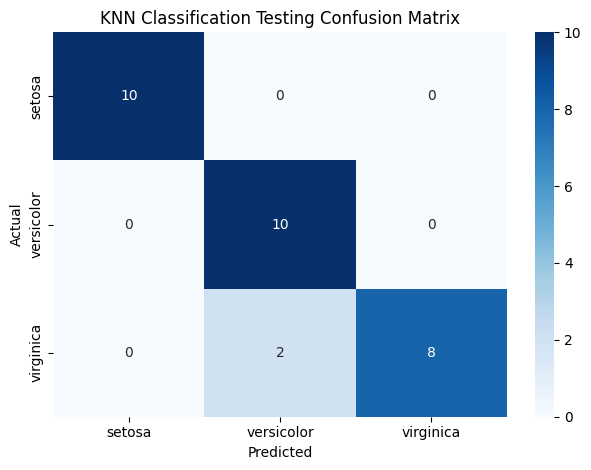

In [22]:
y_pred = best_model.predict(X_test)

# Generating the confusion matrix for KNN
conf_matrix = confusion_matrix(y_test, y_pred)

# Creating a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

plt.title('KNN Classification Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


Only two errors where the predictions were Versicolor but the iris was actually a Virginica.